In [82]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PyEMD import CEEMDAN
from matplotlib.ticker import MaxNLocator

In [83]:
EMIC_PATH  = '/g/data/w40/ab2313/zecmip_new_temp_estimation/emics'

In [129]:
files = np.sort(os.listdir(EMIC_PATH))
files

array(['.ipynb_checkpoints',
       'tas_Bern3D-LPX-ECS2K_esm-1pct-brch-1000PgC_1850_2849.csv',
       'tas_Bern3D-LPX-ECS2K_esm-1pct-brch-2000PgC_1850_2849.csv',
       'tas_Bern3D-LPX-ECS2K_esm-1pct-brch-750PgC_1850_2849.csv',
       'tas_Bern3D-LPX-ECS2K_esm-1pct-brch-ctrlrun_1850_2849.csv',
       'tas_CLIMBER2_esm-1pct-brch-1000PgC_1850_2100.csv',
       'tas_CNRM-ESM2-1_1pctCO2_r1i1p1_185001-199912.csv',
       'tas_CNRM-ESM2-1_esm-1pct-brch-1000PgC_r1i1p1_192001-202012.csv',
       'tas_DCESS1.0_esm-1pct-brch-1000PgC_1765-2833.csv',
       'tas_GFDL-ESM2M_esm-1pct-brch-1000PgC_1861_2360.csv',
       'tas_IAPRAS_esm-1pct-brch-1000PgC_1_1070.csv',
       'tas_LOVECLIM_esm-1pct-brch-1000PgC_1850-3000.csv',
       'tas_MESM_ZERO_1_1200.csv',
       'tas_MESM_esm-1pct-brch-1000PgC_1_1200.csv',
       'tas_MIROC-lite-LCM_1ppa_1-151.csv',
       'tas_MIROC-lite-LCM_esm-1pct-brch-1000PgC_66-1200.csv',
       'tas_PLASIM-GENIE_esm-1pct-brch-1000PgC_0001_1100.csv',
       'tas_UVicESCM2.1

In [222]:
# Step 1: Filter files that contain '1000PgC'
a1_files = [f for f in files if '1000PgC' in f]

# Step 2: Exclude files that contain either 'CNRM' or 'CLIMBER'
# a1_files = [f for f in a1_files if 'CNRM' not in f and 'CLIMBER' not in f]
a1_files = [f for f in a1_files if 'CNRM' not in f and 'GFDL' not in f]
a1_files

['tas_Bern3D-LPX-ECS2K_esm-1pct-brch-1000PgC_1850_2849.csv',
 'tas_CLIMBER2_esm-1pct-brch-1000PgC_1850_2100.csv',
 'tas_DCESS1.0_esm-1pct-brch-1000PgC_1765-2833.csv',
 'tas_IAPRAS_esm-1pct-brch-1000PgC_1_1070.csv',
 'tas_LOVECLIM_esm-1pct-brch-1000PgC_1850-3000.csv',
 'tas_MESM_esm-1pct-brch-1000PgC_1_1200.csv',
 'tas_MIROC-lite-LCM_esm-1pct-brch-1000PgC_66-1200.csv',
 'tas_PLASIM-GENIE_esm-1pct-brch-1000PgC_0001_1100.csv',
 'tas_UVicESCM2.10_esm-1pct-brch-1000PgC_1850-3049.csv']

In [223]:
len(a1_files)

9

In [224]:
[f for f in files if f not in a1_files]

['.ipynb_checkpoints',
 'tas_Bern3D-LPX-ECS2K_esm-1pct-brch-2000PgC_1850_2849.csv',
 'tas_Bern3D-LPX-ECS2K_esm-1pct-brch-750PgC_1850_2849.csv',
 'tas_Bern3D-LPX-ECS2K_esm-1pct-brch-ctrlrun_1850_2849.csv',
 'tas_CNRM-ESM2-1_1pctCO2_r1i1p1_185001-199912.csv',
 'tas_CNRM-ESM2-1_esm-1pct-brch-1000PgC_r1i1p1_192001-202012.csv',
 'tas_GFDL-ESM2M_esm-1pct-brch-1000PgC_1861_2360.csv',
 'tas_MESM_ZERO_1_1200.csv',
 'tas_MIROC-lite-LCM_1ppa_1-151.csv']

In [225]:
headers = ['year', 'GMST']

In [226]:
df1 = pd.read_csv(os.path.join(EMIC_PATH, 'tas_Bern3D-LPX-ECS2K_esm-1pct-brch-1000PgC_1850_2849.csv'), 
                  header=None, names=headers, index_col='year')

<Axes: xlabel='year'>

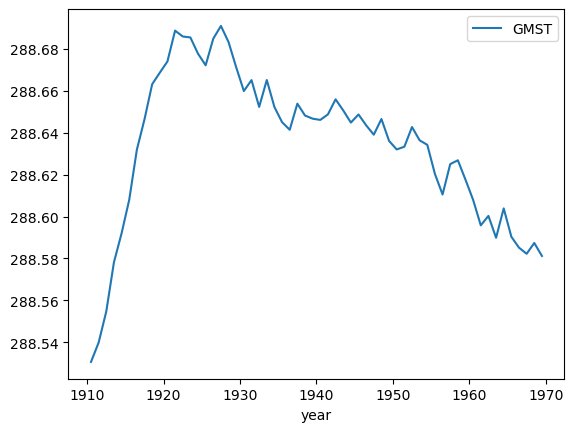

In [227]:
df1.iloc[60:120].plot()

In [228]:
# branch_years = {
#     "BERN ECS 2.0 K": 1918.5,
#     "CESM": 68,
#     "CNRM-ESM2-1": 1920,
#     "CLIMBER2": 1917,
#     "DCESS": 1833.65,
# }


In [229]:
a1_df_list = []
for num,a1f in enumerate(a1_files):
    print(a1f)
    kwargs = dict(header=None) if 'UVic' not in a1f else dict()
    df = pd.read_csv(os.path.join(EMIC_PATH, a1f), **kwargs)
    df = df.iloc[:, 1]
    if np.any(df.values > 200):
        df = df - 273.15
    df.name = a1f.split('_')[1]
    a1_df_list.append(df)

a1_combined_df = pd.concat(a1_df_list, axis=1)

tas_Bern3D-LPX-ECS2K_esm-1pct-brch-1000PgC_1850_2849.csv
tas_CLIMBER2_esm-1pct-brch-1000PgC_1850_2100.csv
tas_DCESS1.0_esm-1pct-brch-1000PgC_1765-2833.csv
tas_IAPRAS_esm-1pct-brch-1000PgC_1_1070.csv
tas_LOVECLIM_esm-1pct-brch-1000PgC_1850-3000.csv
tas_MESM_esm-1pct-brch-1000PgC_1_1200.csv
tas_MIROC-lite-LCM_esm-1pct-brch-1000PgC_66-1200.csv
tas_PLASIM-GENIE_esm-1pct-brch-1000PgC_0001_1100.csv
tas_UVicESCM2.10_esm-1pct-brch-1000PgC_1850-3049.csv


In [230]:
a1_combined_df.columns

Index(['Bern3D-LPX-ECS2K', 'CLIMBER2', 'DCESS1.0', 'IAPRAS', 'LOVECLIM',
       'MESM', 'MIROC-lite-LCM', 'PLASIM-GENIE', 'UVicESCM2.10'],
      dtype='object')

In [350]:
branch_years = {
    "GFDL-ESM2M": 61,
    "Bern3D-LPX-ECS2K": 66,
    'CLIMBER2': 67,
    "DCESS1.0": 71,
    "IAPRAS": 70,
    "LOVECLIM": 70,
    "MESM": 69,
    "MIROC-lite-LCM": 65,
    "PLASIM-GENIE": 62,
    "UVicESCM2.10": 67
}

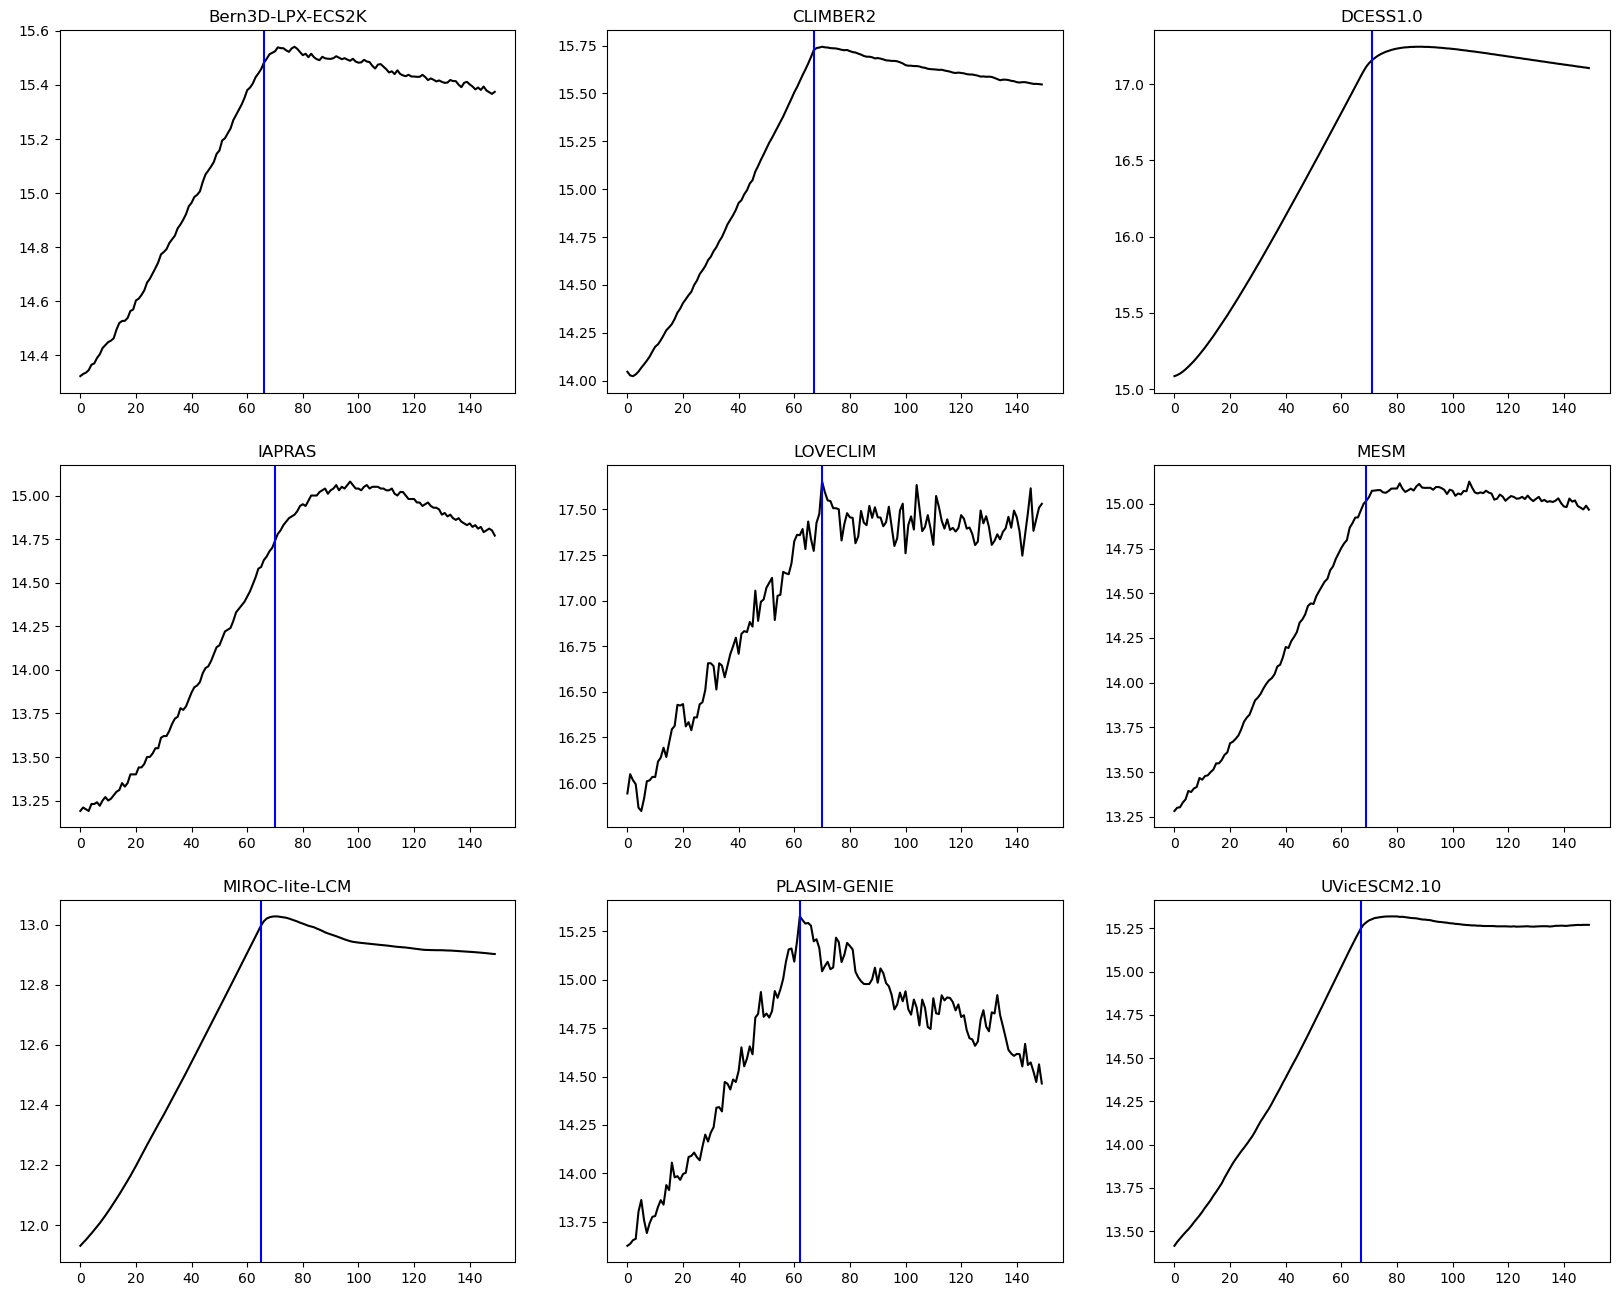

In [351]:
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(3, 3)
axes = [fig.add_subplot(gs[i]) for i in range(9)]


for num, model in enumerate(a1_combined_df.columns):
    ax = axes[num]
    a1_vals = a1_combined_df[model].values
    a1_vals = a1_vals[:150]
    ax.plot(a1_vals, color='black')
    ax.set_title(model)

    a1_start = branch_years[model]
    ax.axvline(a1_start, color='blue')


Bern3D-LPX-ECS2K
CLIMBER2
DCESS1.0
IAPRAS
LOVECLIM
MESM
MIROC-lite-LCM
PLASIM-GENIE
UVicESCM2.10


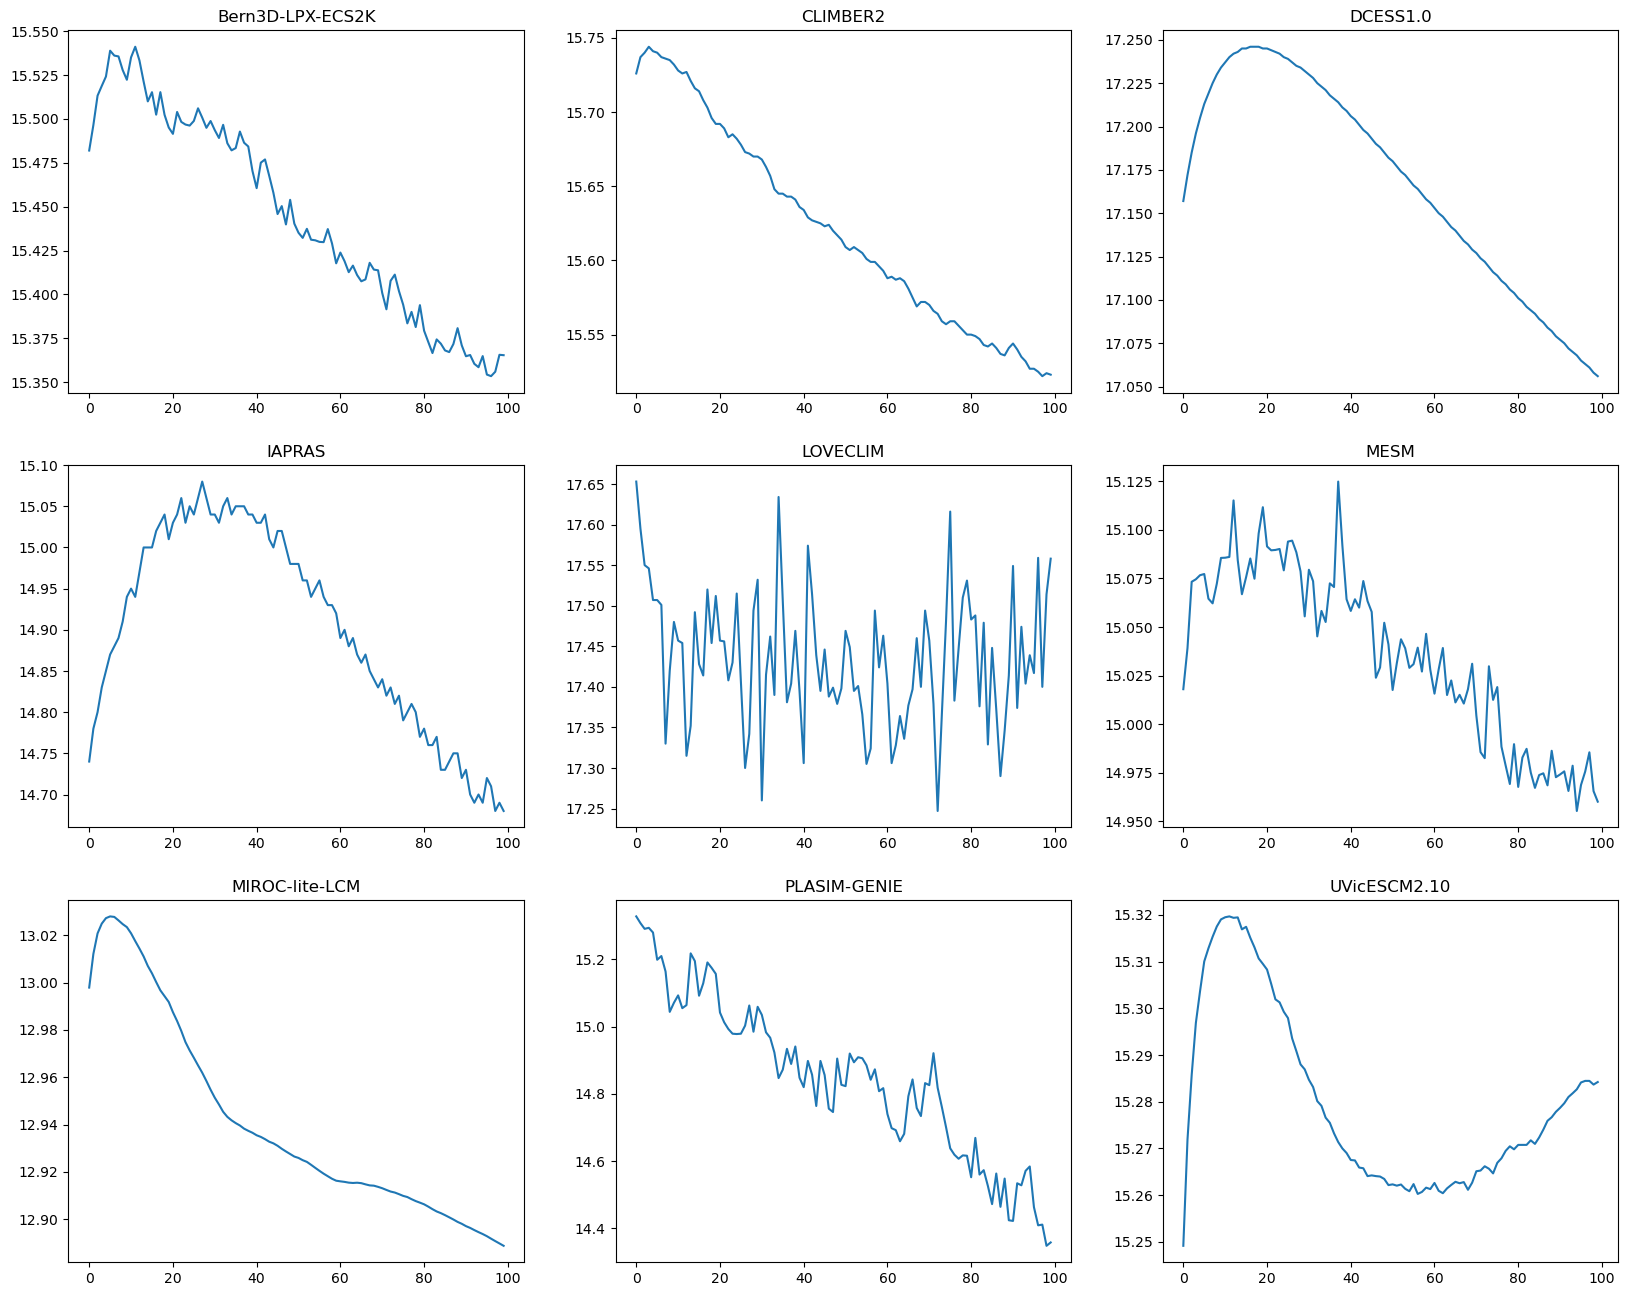

In [352]:
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(3, 3)
axes = [fig.add_subplot(gs[i]) for i in range(9)]


for num, model in enumerate(a1_combined_df.columns):
    print(model)
    ax = axes[num]
    a1_vals = a1_combined_df[model].values
    a1_start = branch_years[model]
    a1_vals = a1_vals[a1_start:a1_start+100]
    ax.plot(a1_vals)
    ax.set_title(model)

# CEEMDAN Analysis 

In [353]:
# Calculate dominant frequency for each IMF using FFT
def dominant_frequency(imf, time):
    # Compute FFT
    fft_vals = np.fft.fft(imf)
    freqs = np.fft.fftfreq(len(imf), d=(time[1] - time[0]))
    
    # Get positive frequencies and corresponding power
    positive_freqs = freqs[freqs > 0]
    power_spectrum = np.abs(fft_vals[freqs > 0])**2
    
    # Dominant frequency is the one with the highest power
    dominant_freq = positive_freqs[np.argmax(power_spectrum)]
    return dominant_freq

# Convert frequency to wavelength (years per cycle)
def frequency_to_wavelength(freq):
    return 1 / freq

In [354]:
def filter_imf_arr(imfs, time, wavelength_threshold:int=50):
    # Filter IMFs based on their wavelength
    filtered_imfs = []
    for imf in imfs:
        freq = dominant_frequency(imf, time)
        wavelength = frequency_to_wavelength(freq)
        
        if wavelength >= wavelength_threshold:
            filtered_imfs.append(imf)
        # Convert the list of filtered IMFs back to an array
    filtered_imfs = np.array(filtered_imfs)
    return filtered_imfs

In [357]:
# Find the maximum length of potential_series
max_len = max(len(a1_combined_df[model].values) - branch_years[model] for model in a1_combined_df.columns)

imf_df = pd.DataFrame()
for num, model in enumerate(a1_combined_df.columns):
    print(model)
    a1_vals = a1_combined_df[model].values
    a1_vals = a1_vals[np.isfinite(a1_vals)]
    a1_start = branch_years[model]
    a1_vals = a1_vals[a1_start:]  # Adjust to match the start year
    
    imfs = ceemdan(a1_vals)
    imfs_filtered = filter_imf_arr(imfs, time=np.arange(100))
    print(imfs_filtered.shape)
    
    potential_series = np.sum(imfs_filtered, axis=0)
    
    # Handle UVic model special case
    if 'UVic' in model:
        potential_series[0] = a1_vals[0]
        print('Override')
    
    # Pad potential_series with NaN to ensure all series have the same length
    padded_series = np.pad(potential_series, (0, max_len - len(potential_series)), 'constant', constant_values=np.nan)
    
    imf_df[model] = padded_series


Bern3D-LPX-ECS2K
(1, 934)
CLIMBER2
(1, 183)
DCESS1.0
(1, 997)
IAPRAS
(5, 1000)
LOVECLIM
(3, 1080)
MESM
(3, 1131)
MIROC-lite-LCM
(4, 1135)
PLASIM-GENIE
(4, 1038)
UVicESCM2.10
(4, 933)
Override


In [285]:
# imf_df = pd.DataFrame()
# for num, model in enumerate(a1_combined_df.columns):
#     print(model)
#     a1_vals = a1_combined_df[model].values
#     a1_vals = a1_vals[np.isfinite(a1_vals)]
#     a1_start = branch_years[model]
#     a1_vals = a1_vals[a1_start:a1_start+100]
#     imfs = ceemdan(a1_vals)
#     filter_imf_arr(imfs, time=np.arange(100))
#     # potential_series = imfs[-1, :] + imfs[-2, :]# + imfs[-3, :] + imfs[-4, :]
#     imfs_filtered = filter_imf_arr(imfs, time=np.arange(100))
#     print(imfs_filtered.shape)

#         # imfs_filtered = imfs[-2:, :]
#     potential_series = np.sum(imfs_filtered, axis=0)
#     if 'UVic' in model:
#         potential_series[0] = a1_vals[0]
#         print('Override')
#     imf_df[model] = potential_series

In [358]:
zec50_ceemdan = imf_df.iloc[50] - imf_df.iloc[0]

In [359]:
zec90_ceemdan = imf_df.iloc[90] - imf_df.iloc[0]

In [360]:
zec90_ceemdan

Bern3D-LPX-ECS2K   -0.140132
CLIMBER2           -0.196044
DCESS1.0           -0.093977
IAPRAS             -0.082897
LOVECLIM           -0.049201
MESM               -0.096864
MIROC-lite-LCM     -0.113442
PLASIM-GENIE       -0.600672
UVicESCM2.10        0.029596
dtype: float64

In [361]:
zec50_ceemdan

Bern3D-LPX-ECS2K   -0.060522
CLIMBER2           -0.121588
DCESS1.0            0.008672
IAPRAS              0.176625
LOVECLIM           -0.087774
MESM               -0.020457
MIROC-lite-LCM     -0.084961
PLASIM-GENIE       -0.200888
UVicESCM2.10        0.013127
dtype: float64

In [362]:
zec50_ceemdan.median(), zec50_ceemdan.mean(), zec50_ceemdan.std()

(-0.060521839247268616, -0.04197397673183071, 0.10590736704969238)

In [363]:
zec50_ceemdan.min(), zec50_ceemdan.max()

(-0.20088756052499335, 0.17662466041127445)

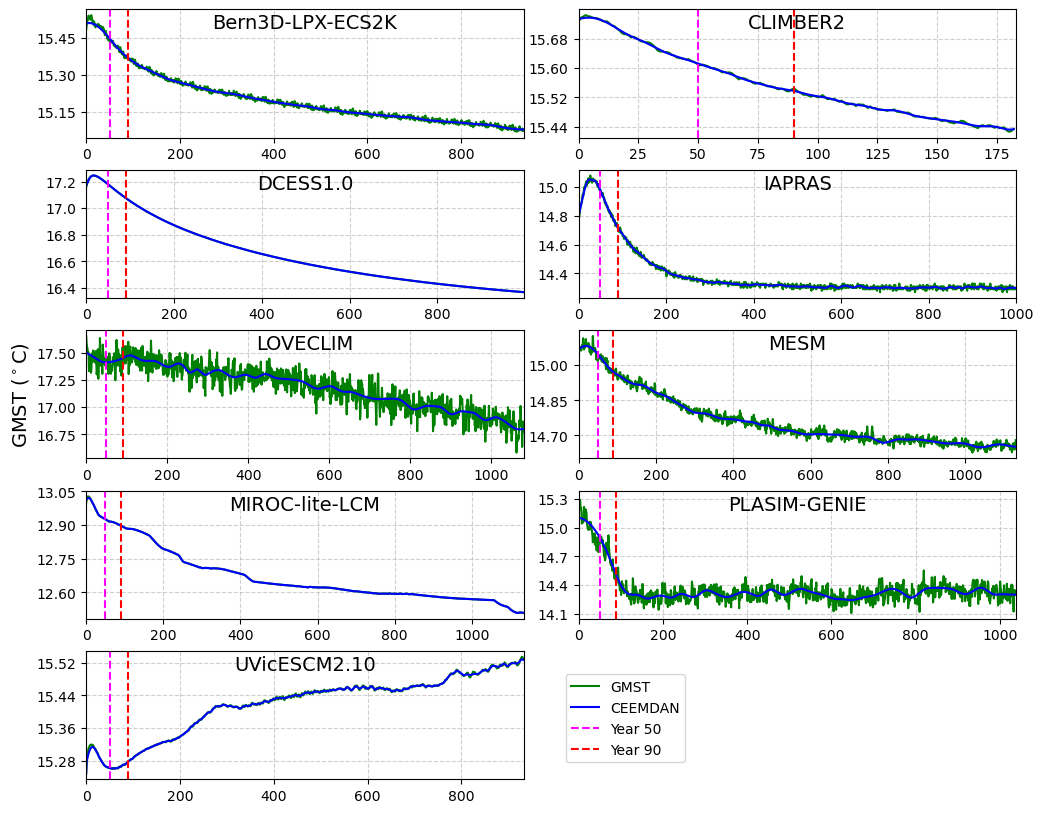

In [396]:
models = a1_combined_df.columns
ncols = 2
nrows = 5#int(np.ceil(len(models)/ncols))

fig = plt.figure(figsize=(6*ncols, 2*nrows))
gs = gridspec.GridSpec(nrows, ncols, hspace=0.25, wspace=0.125)
axes = [fig.add_subplot(gs[i]) for i in range(9)]

for num, model in enumerate(models):
    ax = axes[num]
    a1_vals = a1_combined_df[model].values
    a1_vals = a1_vals[np.isfinite(a1_vals)]
    a1_start = branch_years[model]
    a1_vals = a1_vals[a1_start:]#:a1_start+100]
    ax.plot(a1_vals, label='GMST', color='green')
    ax.plot(imf_df[model].values, label='CEEMDAN', color='blue')
    ax.set_title(model)
    # ax.set_ylabel(r'GMST ($\circ C$)', fontsize=16)
    # ax.set_xlabel('Time After Emission Cessation (Years)', fontsize=16)


    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_title('')
    axes[num].annotate(model, xy=(0.5, 0.85), ha='center', fontsize=14, xycoords='axes fraction')
    axes[num].yaxis.set_major_locator(MaxNLocator(nbins=5))



    if num == int(len(models)/2):  axes[num].set_ylabel('GMST ' + r'($^\circ$C)', fontsize=14)
    else:  ax.set_ylabel('')
    ax.axvline(50, linestyle='--', color='magenta', label='Year 50')
    ax.axvline(90, linestyle='--', color='red', label='Year 90')
    ax.set_xlim(0, len(a1_vals))


# Add a legend in the lower left hand corner
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.63, 0.12))

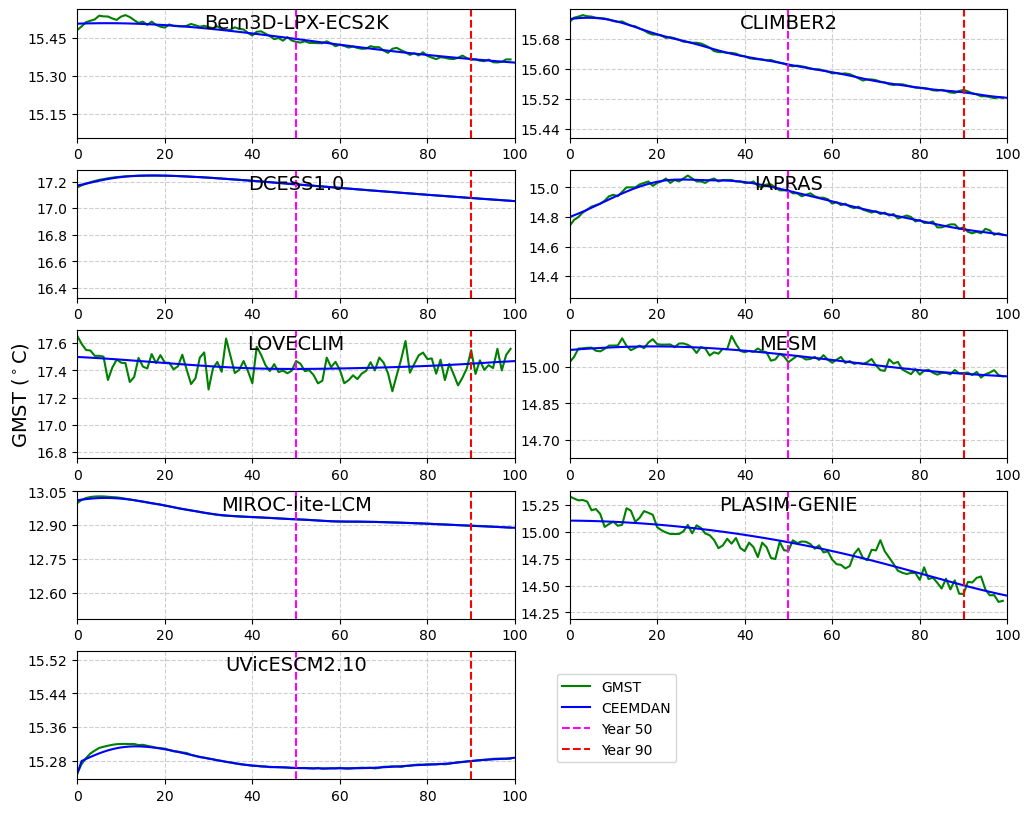

In [374]:
models = a1_combined_df.columns
ncols = 2
nrows = 5#int(np.ceil(len(models)/ncols))

fig = plt.figure(figsize=(6*ncols, 2*nrows))
gs = gridspec.GridSpec(nrows, ncols, hspace=0.25, wspace=0.125)
axes = [fig.add_subplot(gs[i]) for i in range(9)]

for num, model in enumerate(models):
    ax = axes[num]
    a1_vals = a1_combined_df[model].values
    a1_vals = a1_vals[np.isfinite(a1_vals)]
    a1_start = branch_years[model]
    a1_vals = a1_vals[a1_start:]#:a1_start+100]
    a1_vals = a1_vals[:100]
    ax.plot(a1_vals, label='GMST', color='green')
    ax.plot(imf_df[model].values, label='CEEMDAN', color='blue')
    ax.set_title(model)
    # ax.set_ylabel(r'GMST ($\circ C$)', fontsize=16)
    # ax.set_xlabel('Time After Emission Cessation (Years)', fontsize=16)


    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_title('')
    axes[num].annotate(model, xy=(0.5, 0.85), ha='center', fontsize=14, xycoords='axes fraction')
    axes[num].yaxis.set_major_locator(MaxNLocator(nbins=5))



    if num == int(len(models)/2):  axes[num].set_ylabel('GMST ' + r'($^\circ$C)', fontsize=14)
    else:  ax.set_ylabel('')
    ax.axvline(50, linestyle='--', color='magenta', label='Year 50')
    ax.axvline(90, linestyle='--', color='red', label='Year 90')
    ax.set_xlim(0, len(a1_vals))


# Add a legend in the lower left hand corner
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.63, 0.12))

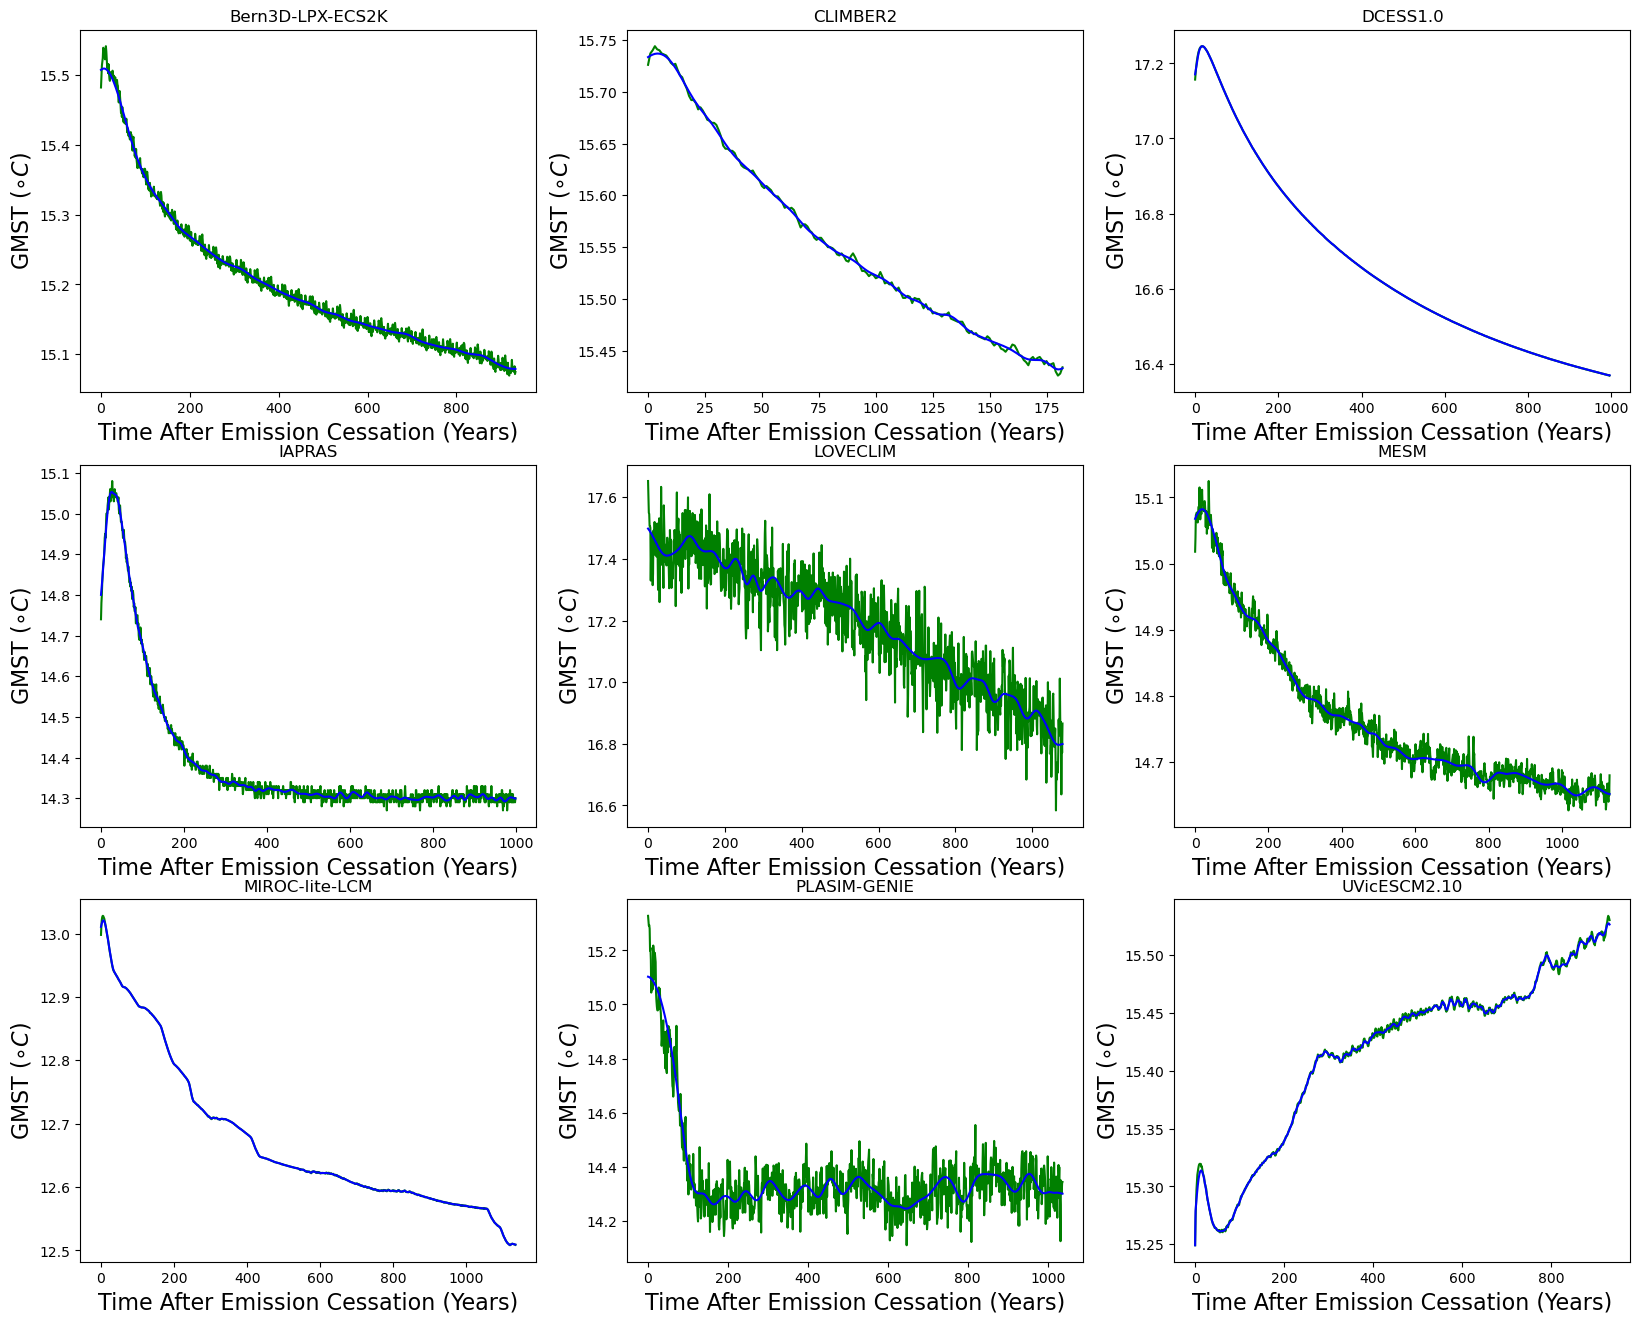

In [366]:
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(3, 3)
axes = [fig.add_subplot(gs[i]) for i in range(9)]


for num, model in enumerate(a1_combined_df.columns):
    ax = axes[num]
    a1_vals = a1_combined_df[model].values
    a1_start = branch_years[model]
    a1_vals = a1_vals[a1_start:]#a1_start+100]
    ax.plot(a1_vals, label='GMST', color='green')
    ax.plot(imf_df[model].values, label='CEEMDAN', color='blue')
    ax.set_title(model)
    ax.set_ylabel(r'GMST ($\circ C$)', fontsize=16)
    ax.set_xlabel('Time After Emission Cessation (Years)', fontsize=16)

# Bar Plots

In [389]:
def plot_temperature_change(x_values, y1, y2, c1='magenta', c2='green', year_num=50, ax=None,
                           fig=None):
    """
    Plots the temperature change after 50 years for two datasets.

    Parameters:
        x_values (np.ndarray): Array of model names or x-values.
        y1 (np.ndarray): Data array for the first dataset (ZEC50).
        y2 (np.ndarray): Data array for the second dataset (EEMD).
        c1 (str): Color for the first dataset bars (default is 'magenta').
        c2 (str): Color for the second dataset bars (default is 'green').
    """

    # Create an array for the y-axis positions
    y = np.arange(len(x_values))

    # Set up the bar height and text offset
    bar_height = 0.35

    # Create the plot
    if ax is None:
        fig, ax = plt.subplots()


    # For y1 dataset
    ax.barh(9 - bar_height / 2, np.max(y1) - np.min(y1), 
            bar_height, left=np.min(y1), color=c1)
    
    # For y2 dataset (EEMD)
    ax.barh(9 + bar_height / 2, np.max(y2) - np.min(y2), 
            bar_height, left=np.min(y2), color=c2)
    
    # Adjust lines to still represent the original min and max if needed
    ax.plot([np.min(y1), np.max(y1)], [9 - bar_height / 2, 9 - bar_height / 2], color=c1)
    ax.plot([np.min(y2), np.max(y2)], [9 + bar_height / 2, 9 + bar_height / 2], color=c2)

    
    # ax.plot([np.min(y2), np.max(y2)], [9 + bar_height / 2, 9 + bar_height / 2], color=c2)
    # ax.plot([np.min(y1), np.max(y1)], [9 - bar_height / 2, 9 - bar_height / 2], color=c1)


    # ax.barh(9 - bar_height / 2, np.nanpercentile(y1, 75) - np.nanpercentile(y1, 25), 
    #         bar_height, left=np.nanpercentile(y1, 25), color=c1)
    
    # # For y2 dataset (EEMD)
    # ax.barh(9 + bar_height / 2, np.nanpercentile(y2, 75) - np.nanpercentile(y2, 25), 
    #         bar_height, left=np.nanpercentile(y2, 25), color=c2)

    
    # ax.plot([np.min(y2), np.max(y2)], [9 + bar_height / 2, 9 + bar_height / 2], color=c2)
    # ax.plot([np.min(y1), np.max(y1)], [9 - bar_height / 2, 9 - bar_height / 2], color=c1)



    # Plot the bars for each dataset
    bars1 = ax.barh(y - bar_height / 2, y1, bar_height, label='20-Year Average', color=c1)
    bars2 = ax.barh(y + bar_height / 2, y2, bar_height, label='CEEMDAN', color=c2)

    # Add labels and title
    ax.set_ylabel('Earth Systems Model of\nIntermediate Complexity')
    ax.set_xlabel(f'Temperature Change After {year_num} years ' + r'($^\circ$C)')
    y = np.append(y, 9)
    ax.set_yticks(y)
    x_values = np.append(x_values, 'Model Range')
    ax.set_yticklabels(x_values)
    ax.legend(loc='lower right')

    ax.axvline(0, color='k', linewidth=0.6)

    # Add vertical lines between each bar set for better model division
    for pos in y:
        ax.axhline(y=pos + 1.5 * bar_height, color='gray', linestyle='--', linewidth=0.5)

    text_offset_base = 0.07  # Variable for text offset

    for i in range(len(y1)):
        text_offset1 = 0 if y1[i] >= 0 else -text_offset_base
        ax.text(y1[i] + text_offset1, i - bar_height / 2, f"{y1[i]:.2f}", va='center', ha='left', color=c1)

        text_offset2 = 0 if y2[i] >= 0 else -text_offset_base
        ax.text(y2[i] + text_offset2, i + bar_height / 2, f"{y2[i]:.2f}", va='center', ha='left', color=c2)

    ax.set_xlim(-0.55, 0.4)

    ax.vlines(x=np.median(y1), ymin=9 - 0.9 * bar_height, ymax=9, color='k', linewidth=2)
    ax.vlines(x=np.median(y2), ymin=9, ymax=9 + bar_height, color='k', linewidth=2)
    ax.annotate(f'{np.median(y1):.2f}', xy=(np.median(y1), 9 - 3.2 * bar_height / 2), ha='center', va='center', 
                color=c1)

    ax.annotate(f'{np.median(y2):.2f}', xy=(np.median(y2), 9 + 3.2 * bar_height / 2), ha='center', va='center', 
                color=c2)

    ax.text(np.max(y1), y[-1] - bar_height / 2, f"{np.max(y1):.2f}", va='center', ha='left', color=c1)
    ax.text(np.min(y1) - text_offset_base, y[-1] - bar_height / 2, f"{np.min(y1):.2f}", va='center',
            ha='left', color=c1)

    ax.set_ylim(y[0] - bar_height * 3 / 2, None)
    ax.text(np.max(y2), y[-1] + bar_height / 2, f"{np.max(y2):.2f}", va='center', ha='left', color=c2)
    ax.text(np.min(y2) - text_offset_base, y[-1] + bar_height / 2, f"{np.min(y2):.2f}", va='center',
            ha='left', color=c2)

    fig.suptitle(f'GMST Changes {year_num} Years After Emission Cessation',
                fontsize=12, y=0.92)

In [390]:

emic_zec50_macdougal = pd.Series({
    "Bern3D-LPX-ECS2K": 0.01,
    'CLIMBER2': -0.07,
    "DCESS1.0": 0.06,
    "IAPRAS": 0.29,
    "LOVECLIM": -0.04,
    "MESM": 0.01,
    "MIROC-lite-LCM": -0.06,
    "PLASIM-GENIE": -0.36,
    "UVicESCM2.10": 0.03,
    # "GFDL-ESM2M": 61  # Uncomment if needed
})


In [391]:
emic_zec50_macdougal.median()

0.01

In [392]:
emic_zec50_macdougal

Bern3D-LPX-ECS2K    0.01
CLIMBER2           -0.07
DCESS1.0            0.06
IAPRAS              0.29
LOVECLIM           -0.04
MESM                0.01
MIROC-lite-LCM     -0.06
PLASIM-GENIE       -0.36
UVicESCM2.10        0.03
dtype: float64

In [393]:
zec50_ceemdan

Bern3D-LPX-ECS2K   -0.060522
CLIMBER2           -0.121588
DCESS1.0            0.008672
IAPRAS              0.176625
LOVECLIM           -0.087774
MESM               -0.020457
MIROC-lite-LCM     -0.084961
PLASIM-GENIE       -0.200888
UVicESCM2.10        0.013127
dtype: float64

In [394]:
zec50_ceemdan.median()

-0.060521839247268616

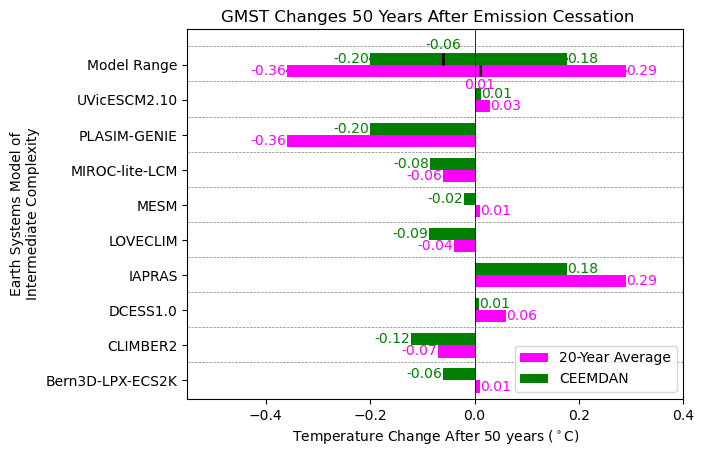

In [395]:
plot_temperature_change(zec50_ceemdan.index,  emic_zec50_macdougal.values, zec50_ceemdan.values,)

In [322]:
plot_temperature_change

<function __main__.plot_temperature_change(x_values, y1, y2, c1='magenta', c2='green', year_num=50, ax=None, fig=None)>

# CEEMDAN Analysis - Old

In [177]:
ceemdan = CEEMDAN()

In [178]:
# arr = a1_combined_df.iloc[69:, 0].values
# arr.shape

In [14]:
EMIC_PATH

'/g/data/w40/ab2313/zecmip_new_temp_estimation/emics'

In [15]:
a1_files

['tas_Bern3D-LPX-ECS2K_esm-1pct-brch-1000PgC_1850_2849.csv',
 'tas_CLIMBER2_esm-1pct-brch-1000PgC_1850_2100.csv',
 'tas_CNRM-ESM2-1_esm-1pct-brch-1000PgC_r1i1p1_192001-202012.csv',
 'tas_DCESS1.0_esm-1pct-brch-1000PgC_1765-2833.csv',
 'tas_LOVECLIM_esm-1pct-brch-1000PgC_1850-3000.csv',
 'tas_MESM_esm-1pct-brch-1000PgC_1_1200.csv',
 'tas_MIROC-lite-LCM_esm-1pct-brch-1000PgC_66-1200.csv',
 'tas_PLASIM-GENIE_esm-1pct-brch-1000PgC_0001_1100.csv']

In [16]:
a1f = a1_files[0]
a1f

'tas_Bern3D-LPX-ECS2K_esm-1pct-brch-1000PgC_1850_2849.csv'

In [17]:
model = a1f.split('_')[1]
model

'Bern3D-LPX-ECS2K'

In [18]:
df = pd.read_csv(os.path.join(EMIC_PATH, a1f), header=None)


In [19]:
branch_year = int(1919.5 - 1850.5)
branch_year

69

In [20]:
df = df.iloc[:, 1]

In [21]:
arr = df.values
arr = arr[np.isfinite(arr)]
arr.shape

(1000,)

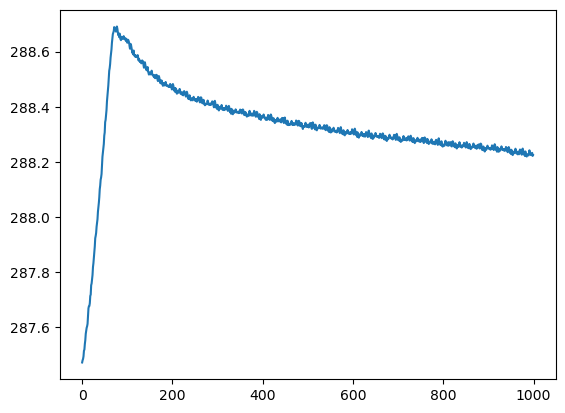

In [22]:
plt.plot(arr)

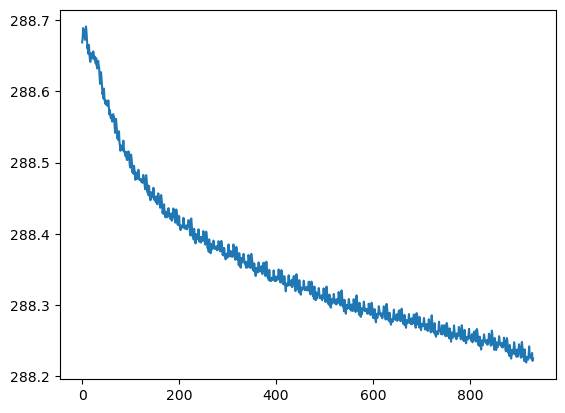

In [23]:
plt.plot(arr[branch_year:])

In [24]:
arr = arr[branch_year:]

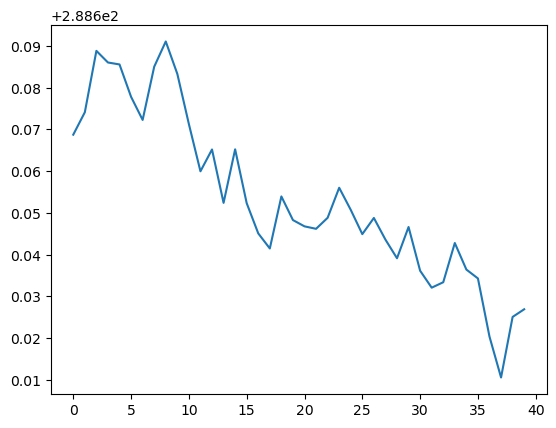

In [25]:
plt.plot(arr[:40])

In [26]:
imfs = ceemdan(arr)

In [27]:
imfs.shape

(5, 931)

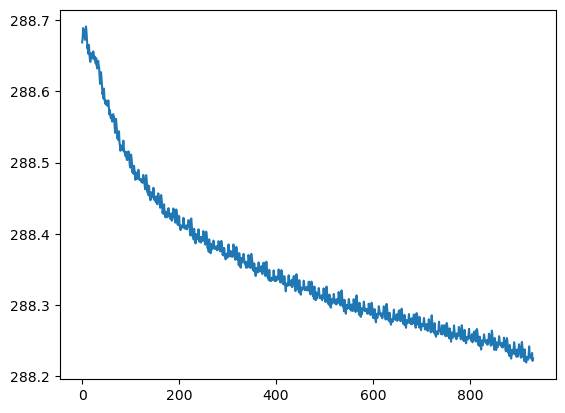

In [28]:
plt.plot(arr)

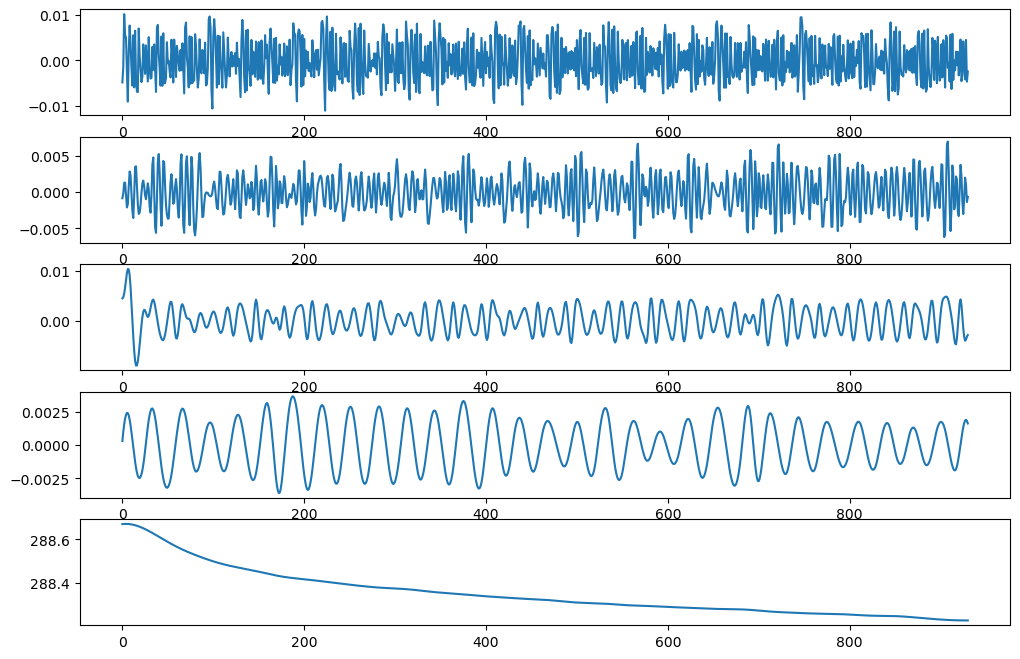

In [29]:
fig = plt.figure(figsize=(12, 8))
n_imfs = imfs.shape[0]
for num in range(n_imfs):
    ax = fig.add_subplot(n_imfs, 1, num+1)
    ax.plot(imfs[num, :])

In [30]:
res = imfs[-1, :]# + imfs[-2, :] + imfs[-3, :] + imfs[-4, :]
res.shape

(931,)

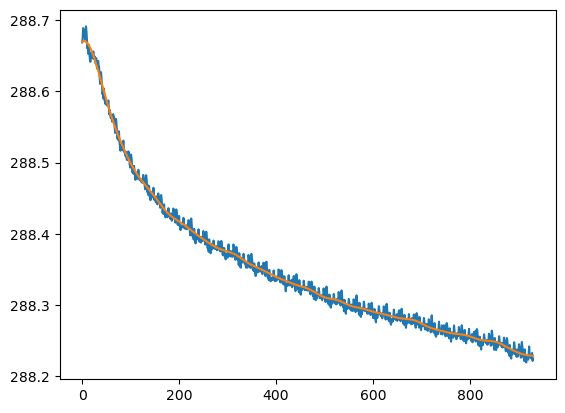

In [31]:
plt.plot(arr)
plt.plot(res)

Text(0.5, 1.0, 'Bern3D-LPX-ECS2K')

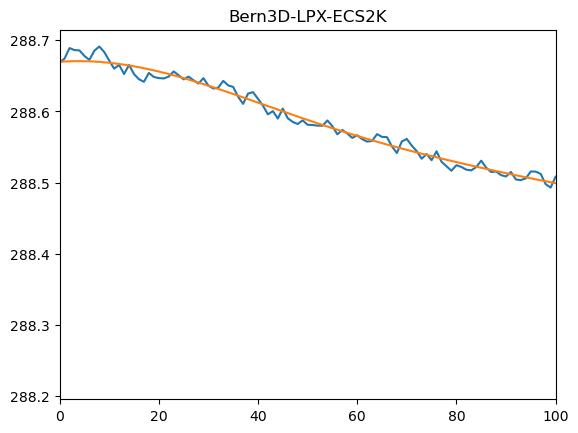

In [32]:
plt.plot(arr)
plt.plot(res)
plt.xlim(0, 100)

plt.title(model)

In [33]:
imf_50 = res[50] - res[0]

In [34]:
imf_50

-0.08171358020052821